# Chinese character image data
## Loading images, basic stats and visualizing the characters.
### John Burt

### December 2018


- Read PNG image file directories, parse filenames to create pandas dataframe with sample info.

- Category (character ID and era) frequency stats.

- Find characters that have a minimum number of examples. 

- Visualize the character dataset 

In [1]:
# basic notebook setup

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np


### Parse datafiles to create sample info dataframe



In [2]:
import os
import re

code = [] # character code (converted to int)
era = [] # era
index = [] # index of sample for this code and era
path = [] # file path to read image data

sourcetop = 'ch_train_set' # name of dir holding image data

# Seek through data folder for PNG files
for dirpath, dirnames, filelist in os.walk(top=sourcetop):
    # change any \ to /
    srcdir = dirpath.replace('\\','/')
    # look for any PNG files in the current folder
    for fname in filelist:
        if fname[-3:]=='png':
            # parse filename to get image category data
            parts = re.split('/|-|_|\.',fname)
            # files with category info in filename
            if len(parts) > 2:
                # get image file path
                path.append(srcdir+'/'+fname)
                code.append(int(parts[0], 16)) # convert character code str to int
                era.append(parts[1])
                index.append(int(parts[2]))  
            # modern figure image file
            else:
                path.append(srcdir+'/'+fname)
                code.append(int(parts[0], 16)) # convert character code str to int
                era.append('modern')
                index.append(0)    

# create info dataframe
df = pd.DataFrame( 
    {
    'code' : code, 
    'era' : era, 
    'id' : index, 
    'path' : path
    } )

df.head()

,code,era,id,path
0,42048,chuxi,1,ch_train_set/a440/a440-chuxi_001.png
1,42048,chuxi,2,ch_train_set/a440/a440-chuxi_002.png
2,42048,chuxi,4,ch_train_set/a440/a440-chuxi_004.png
3,42048,chuxi,5,ch_train_set/a440/a440-chuxi_005.png
4,42048,chuxi,6,ch_train_set/a440/a440-chuxi_006.png


### sample frequencies

Histogram of # samples of each character code (all eras combined).

Note: there is one character code that has 710 samples. I excluded it from the histo range.

min #samples: 10, max #samples: 710

[710 236 212 208 197 195 193 193 169 166 164 161 158 156 154 147 145 145
 129 124 123 120 114 105 102 101  94  93  92  92  91  79  79  79  74  72
  71  68  67  66  66  65  65  64  63  62  57  56  56  52  52  52  50  48
  47  44  44  43  42  41  40  40  39  38  37  37  36  35  35  33  33  33
  32  31  30  29  29  28  27  27  27  26  26  26  23  23  22  22  21  21
  21  19  19  19  19  18  18  17  17  17  17  16  16  15  15  15  14  14
  14  14  14  14  14  13  13  13  12  12  11  11  11  11  10  10  10]


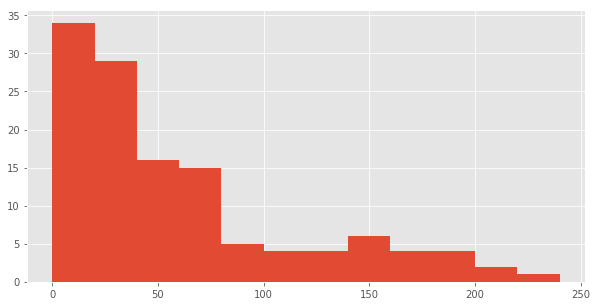

In [3]:
codes = df.code.unique() # get list of codes
counts = []
# cound samples of each code
for code in codes:
    counts.append((df.code==code).sum())

# sort list by sample counts, descending order
idx =  np.flip(np.argsort(counts), axis=0)

print('min #samples: %d, max #samples: %d\n'%(min(counts), max(counts)))

print(np.array(counts)[idx])

plt.figure(figsize=(10,5))
pd.Series(counts)[np.argsort(counts)].hist(bins=list(range(0,250,20)));



### List character codes that meet a specified minimum sample criteria


In [4]:

# specify here the min # samples for each era:
#  chuxi, jinwen, oracle, smallseal
minsamples = [50, 50, 0, 0]

okcodes = []

print('code\t#chuxi\t#jinwen\t#oracle\t#smallseal')
for code in codes[idx]:
    if ((df.id[(df.code==code) & (df.era=='chuxi')].unique().shape[0] >= minsamples[0]) &
        (df.id[(df.code==code) & (df.era=='jinwen')].unique().shape[0] >= minsamples[1]) &
        (df.id[(df.code==code) & (df.era=='oracle')].unique().shape[0] >= minsamples[2]) &
        (df.id[(df.code==code) & (df.era=='smallseal')].unique().shape[0] >= minsamples[3]) 
       ):
        okcodes.append(code)
        print('%4X\t%3d\t%3d\t%3d\t%3d'%(
            code, 
            df.id[(df.code==code) & (df.era=='chuxi')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='jinwen')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='oracle')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='smallseal')].unique().shape[0],
        ))
        
print("\n%d codes met min criteria of "%(len(okcodes)),minsamples)


code	#chuxi	#jinwen	#oracle	#smallseal
A4A7	603	105	  1	  0
A4EB	102	107	  2	  0
A453	145	 61	  1	  0
A548	142	 52	  2	  0
A46C	 63	124	  2	  3
B6C0	110	 54	  2	  2
B0A8	 94	 67	  1	  3
AAF7	 78	 83	  0	  2
A4A3	100	 55	  2	  0
A4BD	 85	 67	  1	  0
A4FD	 60	 79	  3	  2

11 codes met min criteria of  [50, 50, 0, 0]


### Load image data into numpy array

Convert so that ink = 1, whitespace = 0

A440 chuxi 1 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0]


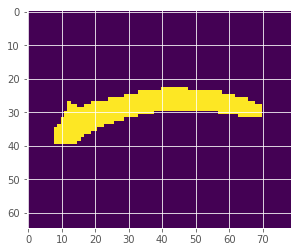

In [5]:
from PIL import Image

# read image, convert to int, and invert so that 1=ink, 0=whitespace
arr = np.asarray(Image.open(df.path[0])).astype(int)

plt.imshow(arr)

print('%X'%(df.code[0]), df.era[0], df.id[0], arr[30,:])
                                         

### View some images

View the top N characters that met the above criteria

Note: I use the PIL module here for image display instead of scipy imageio, even though it's a bit of a pain, because imageio is being depreciated and so the code will eventually break if it is used.

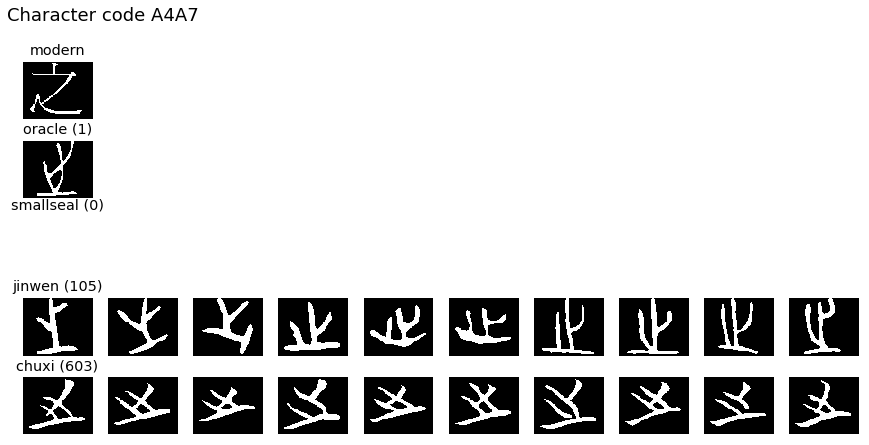

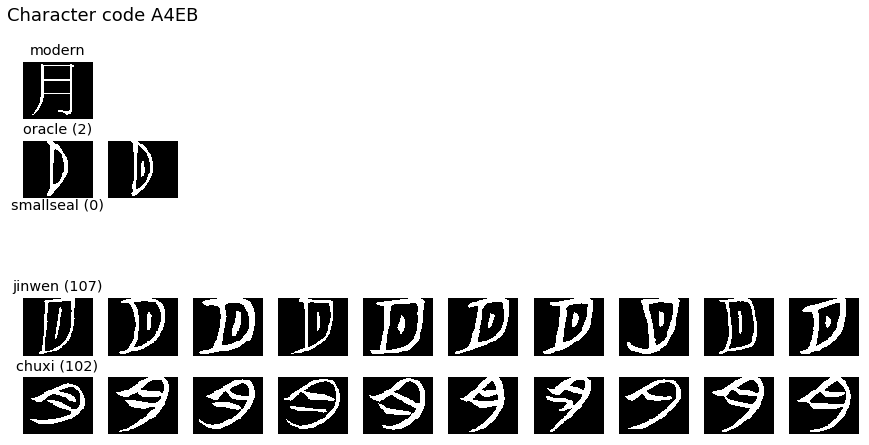

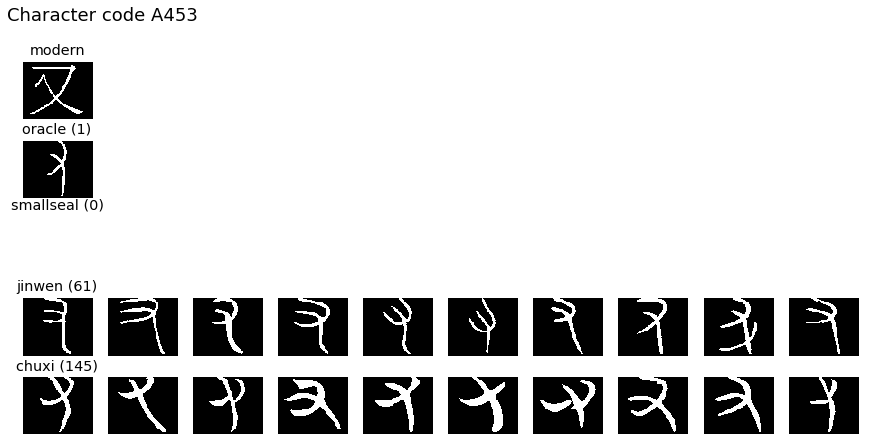

In [6]:
from PIL import Image

# view this many examples of each character code and era
numcols = 10 

# max number of characters to view
maxcodes = 3

# display examples of each of the most sampled codes
for code in okcodes[:maxcodes]:
    f, axes = plt.subplots(5,numcols,figsize=(15,7),subplot_kw={'xticks': [], 'yticks': [], 'fc':'none'})
    f.suptitle('Character code %X'%(code), x=.2, fontsize=18)
    
    # display the modern character exmple (there's only one)
    modernpath = df.path[(df.code==code) & (df.era=='modern')].values[0]
    axes[0, 0].imshow(Image.open(modernpath))
    axes[0, 0].set_title('modern')
        
    # display examples of each era, if there are any
    for era,eranum in zip(['oracle', 'smallseal', 'jinwen', 'chuxi'], range(4)):
        # get paths of example images of this code and era
        paths = df.path[(df.code==code) & (df.era==era)].values
        # check whether there are any examples
        if paths.shape[0]:
            # display up to numcols examples
            for i in range(min(numcols,paths.shape[0])):
                # read the image from file and then show it in the plot axis
                axes[eranum+1, i].imshow(Image.open(paths[i]))
        # indicate era and # samples in title of first example 
        axes[eranum+1, 0].set_title(era+' (%d)'%paths.shape[0])
        
    plt.show();

